# Feature extraction

So, this is the first Notebook of this *Course No4 project* :-)

This first Notebook will extract a higk-level feature ot the *"Swissroads" data set from EPFL Extension School*

I've made the choice to use *Inception v3* which will result in a 2048 high.level features.

Let's start...

## What kind of images are we talking about ?

First of all, I should grab some information on the images: width, height, number of color. Those element are very important as they will be used to build our high-level feature.

To do so, I'll use the *PIL.Image* lib and open one of the picture of the train set

> Note: I assume that all the images have the same characteristics

Image size: (256, 256) - Color: RGB



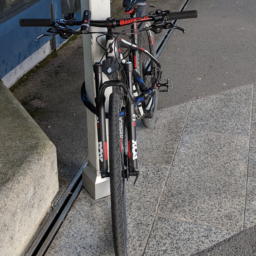

In [1]:
from PIL import Image
import os

img=Image.open(os.path.join('data','train', 'bike', 'bike-0001.png'))

print("Image size: {} - Color: {}\n".format(img.size, img.mode))
img

First thing to notice, the images will have to be resized as the *Inception V3* neural network expects image size = 299x299.

I'll use the *resize()* method of the PIL.Image lib to upscale the image dataset (resize algorythm will be *Image.BICUBIC*)

Here is how the upscaled image looks like:

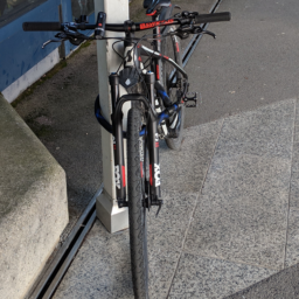

In [2]:
img_resized=img.resize([299,299], Image.BICUBIC)
img_resized

### Conclusion

1. Images will have to be upscaled when creating batch of images
2. Color space is RGB, which means that color is encoded with 3 integers

=> Upscaled image shape is (299, 299, 3)
=> The RGB integer values must be standardized using a rescale value of 1/255

## Create batch of images

According to the structure of the dataset provided here, the best choice is to use the *ImageDataGenerator* lib to build our batch of images: Train, test and valid.

This lib will be used to build a train, valid and test dataset.

The use of this library is quite straight forward. Do not forget to upscale images !!

> Note: Train, test and valid dataset are in separated folders, which means that we do not have to split any of it to build another dataset.

> Question: Should we use horizonal_flip and rotation_range as we^ve done in the course ?

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image generators for esach dataset
train_generator=ImageDataGenerator(rescale=1/255, horizontal_flip=True, rotation_range=5)
valid_generator=ImageDataGenerator(rescale=1/255, horizontal_flip=True, rotation_range=5)
test_generator=ImageDataGenerator(rescale=1/255)


In [25]:
# Some constant for easy tuning
BATCH_SIZE=64

# Train, validation and test sets from the three directories
trainset = train_generator.flow_from_directory(
    os.path.join('data','train'), batch_size=BATCH_SIZE, target_size=(299,299), shuffle=True)
validset = train_generator.flow_from_directory(
    os.path.join('data','valid'), batch_size=BATCH_SIZE, target_size=(299,299), shuffle=False)
testset = test_generator.flow_from_directory(
    os.path.join('data','test'), batch_size=BATCH_SIZE, target_size=(299,299), shuffle=False)

Found 281 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


## Create high-level features

Now that our batch of images are ready, we can build our high-level features using *Inception V3* neural network.

According to documentation, the module url is: "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"

In order to use it, I will create a graph object, use the *tensorflow_hub* to grab the online saved model. create a placeholder for the images, a node with the features and a group of initializers

In [26]:
import tensorflow as tf
import tensorflow_hub as hub

# Create graph
img_graph = tf.Graph()

with img_graph.as_default():
    # Download module
    module_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"
    feature_extractor = hub.Module(module_url)

    # Create input placeholder
    input_imgs = tf.placeholder(dtype=tf.float32, shape=[None, 299, 299, 3])

    # A node with the features
    imgs_features = feature_extractor(input_imgs)

    # Collect initializers
    init_op = tf.group([
        tf.global_variables_initializer(), tf.tables_initializer()
    ])

img_graph.finalize() # Good practice: make the graph "read-only"

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [27]:
# Create a session
sess = tf.Session(graph=img_graph)

# Initialize it
sess.run(init_op)

# Extract features
features = sess.run(imgs_features, feed_dict={input_imgs: trainset})
features.shape # (1, 1280)

KeyboardInterrupt: 

In [ ]:

### NOT FINISHED

module_spec = hub.load_module_spec("path/to/module")
  height, width = hub.get_expected_image_size(module_spec)
  images = ...  # A batch of images with shape [batch_size, height, width, 3].
  module = hub.Module(module_spec)
  features = module(images)   # A batch with shape [batch_size, num_features].

In [ ]:
module = hub.Module("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
features = module(images)  # Features with shape [batch_size, num_features].
